# Reglas de asociación APRIORI

## Definición

Una regla de asociación es una expresión $X \rightarrow Y$ donde $X$ es un conjunto de artículos y $Y$ es solo un artículo. Es decir la asociación entre los artículos de $X$ con el artículo de $Y$.


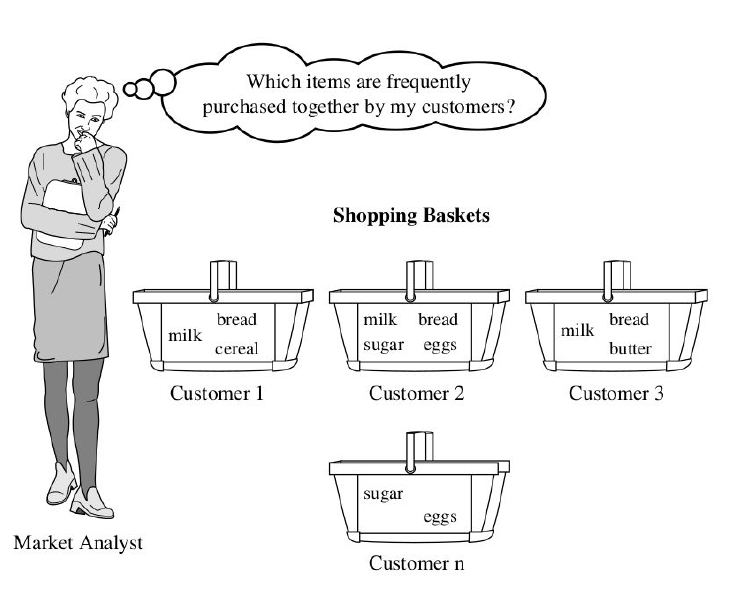


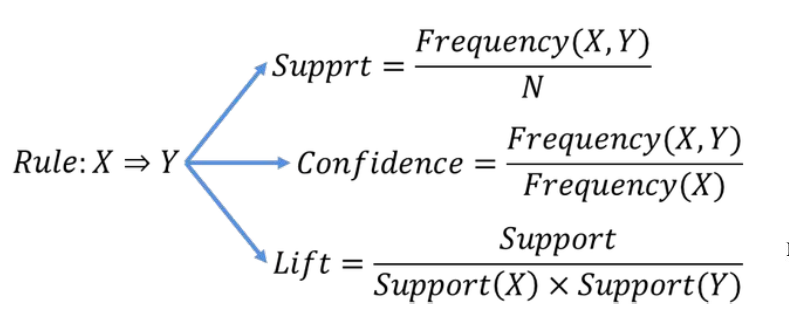


![Market basket analysis transactions](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fres.cloudinary.com%2Fdyd911kmh%2Fimage%2Fupload%2Ff_auto%2Cq_auto%3Abest%2Fv1530898580%2FImage_1_ip8nzc.png&f=1&nofb=1)

Para ello, el algoritmo apriori es uno de los más utilizados en este tema y permite encontrar de forma eficiente conjuntos de items frecuentes, los cuales sirven de base para generar reglas de asociación entre los items.

La forma de generar las reglas de asociación consta de dos pasos:

- *Generación de combinaciones frecuentes:* cuyo objetivo es encontrar aquellos conjuntos que sean frecuentes en la base de datos. Para determinar la frecuencia se establece un umbral.

- *Generación de reglas:* A partir de los conjuntos frecuentes se crean las reglas en base al ordenamiento de un índice que establece los grupos de items o productos frecuentes.

# ¿Cómo funciona un algoritmo de asociación Apriori?




# Support


El parámetro “support”, refleja  que tan popular es el artículo, lo cual demuestra la proporción que este aparece en la totalidad de las transacciones

$support = \frac{frecuency(X, Y)}{N}$

Donde:

- $X$ = Es un conjunto de artículos
- $Y$ = Un solo artículo a relacionar
- $N$ = Cantidad de artículos en total de la canasta

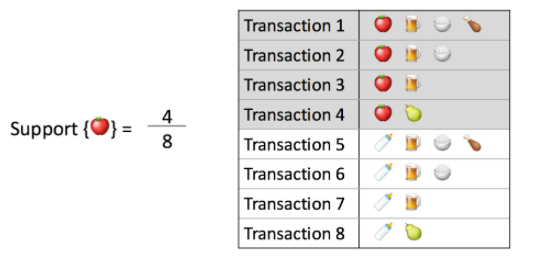


# Confidence

El parámetro “Confidence”, refleja  que tan posible es que se compre el producto $Y$ cuando se compre el producto $X$ y se expresa de manera : ${X \rightarrow Y}$
Se mide por la proporción en que el producto $Y$ aparece cuando se compra el producto $X$.

$confidence = \frac{frecuency(X, Y)}{frecuency(X)}$


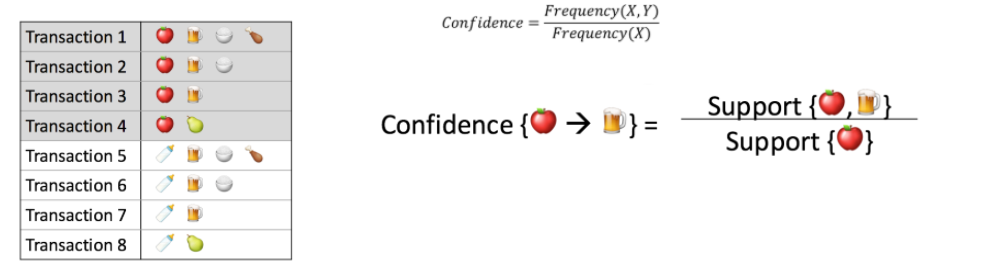


Cual es el "Confidence" de {Manzana-> Cerveza} ?
 3 / 4 o  75%.


# Lift

El parámetro “Lift”, refleja  que tan posible es que se compre el producto $Y$ cuando se compre el producto $X$, pero controlando que tan popular es Y. 

El Lift de nuestra en la tabla ${Manzana \rightarrow Cerveza} = 1$ lo que significa que no existe asociación  entre los productos. 

El lift > 1 significa que más probable que se compre el producto Y cuando se compre el X. 

El Lift <= 1 significa que el producto Y no es probable que se compre Y cuando se compre el X.


Entre mas alto se encuentre el lift, es mas probable que se compren esos productos juntos.

$lift = \frac{support}{support(X)support(Y)}$

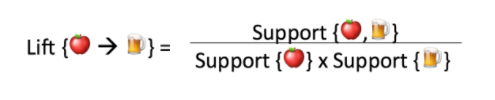

![Lift](https://qph.fs.quoracdn.net/main-qimg-48f9336a3f687bf7d88742252a6fc893)

# EJEMPLO - Practica

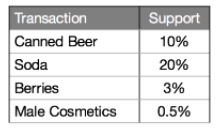

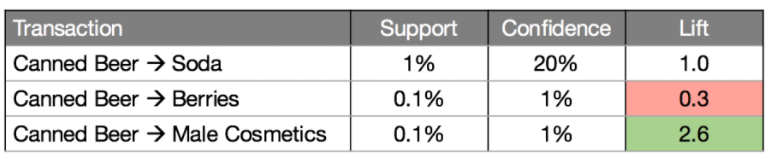

# Respuesta


{Cerveza->Soda} se tiene un confidence de 20% pero estos aparecen con bastante frecuencia en nuestra tabla significando que esto nos puede afectar a nuestra hipótesis. además vemos que su lift es de 1 lo cual no existe gran relación. 

{Cerveza -> Cosméticos} se obtiene un confidence bajo pero por su cantidades de compra sin embargo en cada una de las compras es más probable que cuando compran cosméticos también se compre cerveza por que su lift es de 2.6. 

{Cerveza-> Berries}  aquellos que compras cerezas no compran cerveza. 



# Algoritmo

- Paso 1. Se establecen los valores mínimos para el soporte y la confianza
- Paso 2. Se toman todos los subconjuntos de transacciones que tienen un - soporte mayor al valor del soporte mínimo.
- Paso 3. Tomar todas las reglas de estos subconjuntos que tengan una confianza mayor al valor de la confianza mínima.
- Paso 4. Ordenar las reglas de forma decreciente en base al valor del lift.

# Aplicación

Para trabajar se puede importar datos desde el repositorio de datos para aprendizaje automático de la Universidad de California, Irvine. El conjunto de datos se encuentra en formato CSV, así que se pueden utilizar las funciones de Pandas para hacer la lectura.

In [1]:
# Cargamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('Market_Basket_Optimisation.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transformación

Transformando las listas dentro de otras listas de las columnas

In [2]:
# Obtener una lista de todos lo productos que estan en el estudio
transactions = []
for i in range(0, df.shape[0]):
    transactions.append([str(df.values[i, j]) for j in range(0, 20)])

print(transactions[0])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In [3]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

## Obtención de reglas de asociación

Ahora se pude utilizar la función `apriori` para obtener los productos con un mínimo de soporte y todas las características que necesitamos en los hiperparámetros.

**La siguiente manera que se presenta es otra manera de descargar librerías para nuestra implementación.**

In [4]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=9a5a019b7994880a0ab534d2a03502218d7da7b12b8de54a3f5db96665c6a22c
  Stored in directory: c:\users\benat\appdata\local\pip\cache\wheels\cb\f6\e1\57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [5]:
from apyori import apriori

rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)  

In [6]:
results = list(rules)

print(results)


[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]), RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]), RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]), RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0.24

In [7]:
results[0:2]

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])]

In [8]:
def inspect(results):
    rh          = [tuple(result[2][0][0]) for result in results]
    lh          = [tuple(result[2][0][1]) for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(rh, lh, supports, confidences, lifts))

In [9]:
# Este comamdo crea un frame para ver los datos resultados
resultDataFrame=pd.DataFrame(inspect(results),
                columns=['X','Y','support','confidence','lift'])

In [10]:
resultDataFrame.sort_values(by='lift',ascending= True)

,X,Y,support,confidence,lift
49,"(ground beef, shrimp)","(spaghetti,)",0.005999,0.523256,3.005315
121,"(ground beef, shrimp)","(spaghetti, nan)",0.005999,0.523256,3.005315
36,"(spaghetti, frozen vegetables)","(shrimp,)",0.005999,0.215311,3.013149
106,"(spaghetti, frozen vegetables)","(shrimp, nan)",0.005999,0.215311,3.018781
98,"(milk, mineral water, spaghetti)","(frozen vegetables,)",0.004533,0.288136,3.022804
...,...,...,...,...,...
132,"(mineral water, whole wheat pasta)","(olive oil, nan)",0.003866,0.402778,6.128268
149,"(olive oil, frozen vegetables)","(milk, mineral water, nan)",0.003333,0.294118,6.128268
96,"(olive oil, frozen vegetables)","(milk, mineral water)",0.003333,0.294118,6.128268
97,"(soup, frozen vegetables)","(milk, mineral water)",0.003066,0.383333,7.987176
